### Classification Example Using Tensorflow 

In [1]:
import pandas as pd
%matplotlib inline
import os, sys
import itertools
import numpy as np


#### Import the data



In [3]:
import numpy as np

a = np.random.rand(3,5)
print(a)

#Load in the data
from sklearn.datasets import load_breast_cancer

[[0.0925148  0.52737335 0.1687693  0.66742535 0.93598911]
 [0.7272834  0.26408496 0.72539038 0.12044141 0.90243304]
 [0.90958008 0.35907835 0.59950273 0.9922755  0.18425444]]


In [4]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.0.0


In [6]:
# load the data
data = load_breast_cancer()

In [11]:

type(data)
# note: it is a Bunch object
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
# normally we would put all of our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split


# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [16]:
# Scale the data
# you'll learn why scaling is needed in a later course
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train.shape

(381, 30)

In [20]:
# Now all the fun Tensorflow stuff
# Build the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

accuracy: 0.9711 - val_loss: 0.0924 - val_accuracy: 0.9681
Epoch 83/100
381/381 [==============================] - 0s 131us/sample - loss: 0.0953 - accuracy: 0.9711 - val_loss: 0.0920 - val_accuracy: 0.9681
Epoch 84/100
381/381 [==============================] - 0s 126us/sample - loss: 0.0949 - accuracy: 0.9711 - val_loss: 0.0915 - val_accuracy: 0.9681
Epoch 85/100
381/381 [==============================] - 0s 122us/sample - loss: 0.0945 - accuracy: 0.9711 - val_loss: 0.0910 - val_accuracy: 0.9681
Epoch 86/100
381/381 [==============================] - 0s 113us/sample - loss: 0.0940 - accuracy: 0.9711 - val_loss: 0.0905 - val_accuracy: 0.9681
Epoch 87/100
381/381 [==============================] - 0s 100us/sample - loss: 0.0936 - accuracy: 0.9711 - val_loss: 0.0901 - val_accuracy: 0.9734
Epoch 88/100
381/381 [==============================] - 0s 105us/sample - loss: 0.0931 - accuracy: 0.9711 - val_loss: 0.0898 - val_accuracy: 0.9734
Epoch 89/100
381/381 [==============================]

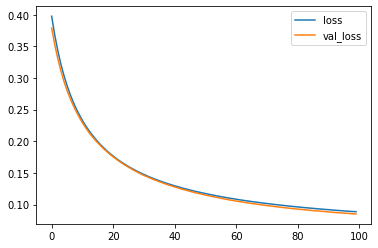

In [21]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

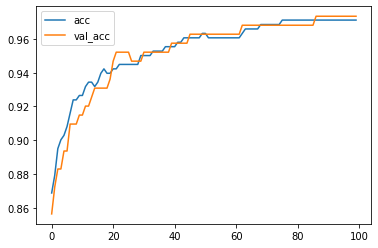

In [22]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [24]:
# Make predictions
P = model.predict(X_test)
#print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

In [25]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.]


In [26]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.973404255319149
188/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [27]:
# Let's now save our model to a file
model.save('linearclassifier.h5')

In [28]:
!ls -1h

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [30]:
model_import = tf.keras.models.load_model("linearclassifier.h5")
print(model_import)
model_import.evaluate(X_test, y_test)

188/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.0852719098329544, 0.9734042]